In [1]:
# IMPORTING LIBRARIES

import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [2]:
# UPLOADING DATASET MANUALLY (RIVER_TRAIN_DATASET_A1.xlsx)

from google.colab import files
uploaded = files.upload()


df = pd.read_excel("RIVER_TRAIN_DATASET_A1.xlsx",
                    index_col = "Date",
                   parse_dates = True).asfreq("D")

Saving RIVER_TRAIN_DATASET_A1.xlsx to RIVER_TRAIN_DATASET_A1 (5).xlsx


In [3]:
# CHECKING HEAD

df.head(10)

,Mean_Rainfall,Mean_Temp,Actual_Hydrometry
Date,,,
2000-06-25,2.789049,16.605386,1.1650
2000-06-26,2.789049,16.605386,1.1550
2000-06-27,2.789049,16.605386,1.1325
2000-06-28,2.789049,16.605386,1.1100
2000-06-29,2.789049,16.605386,1.1250
2000-06-30,2.789049,16.605386,1.1100
2000-07-01,2.789049,16.605386,1.0900
2000-07-02,2.789049,16.605386,1.1450
2000-07-03,2.789049,16.605386,1.1450


In [4]:
# DEFINING TRAIN/TEST PORTIONS FOR THE TARGET VARIABLE (HYDROMETRY) AND THE EXOGENOUS VARIABLES (FOR SARIMAX MODEL)
# TEST PORTION = LAST YEAR
# TRAIN PORTION = REST OF THE DATASET

# Target Series
training_y = df["Actual_Hydrometry"].iloc[:-365]
test_y = df["Actual_Hydrometry"].iloc[-365:]

# Exogenous Variables
exog_train = df[["Mean_Temp", "Mean_Rainfall"]].iloc[:-365]
exog_test = df[["Mean_Temp", "Mean_Rainfall"]].iloc[-365:]

In [5]:
# DEFINING MODEL (SARIMAX) AND ITS PARAMETERS

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    training_y,
    exog=exog_train,
    order=(1, 0, 1),              # (p,d,q)
    seasonal_order=(1, 1, 0, 52) # (P,D,Q,m) seasonality (m) was supposed to be 365, since we are talking about water levels. For a matter of time (training) we are setting it to 1 or 52
)

In [6]:
# STARTING TRAINING (10 MINUTES REQUIRED)

results = model.fit(disp=False)


In [7]:
# DEFINING FORECAST

forecast = results.predict(
    start=test_y.index[0],
    end=test_y.index[-1],
    exog=exog_test
)

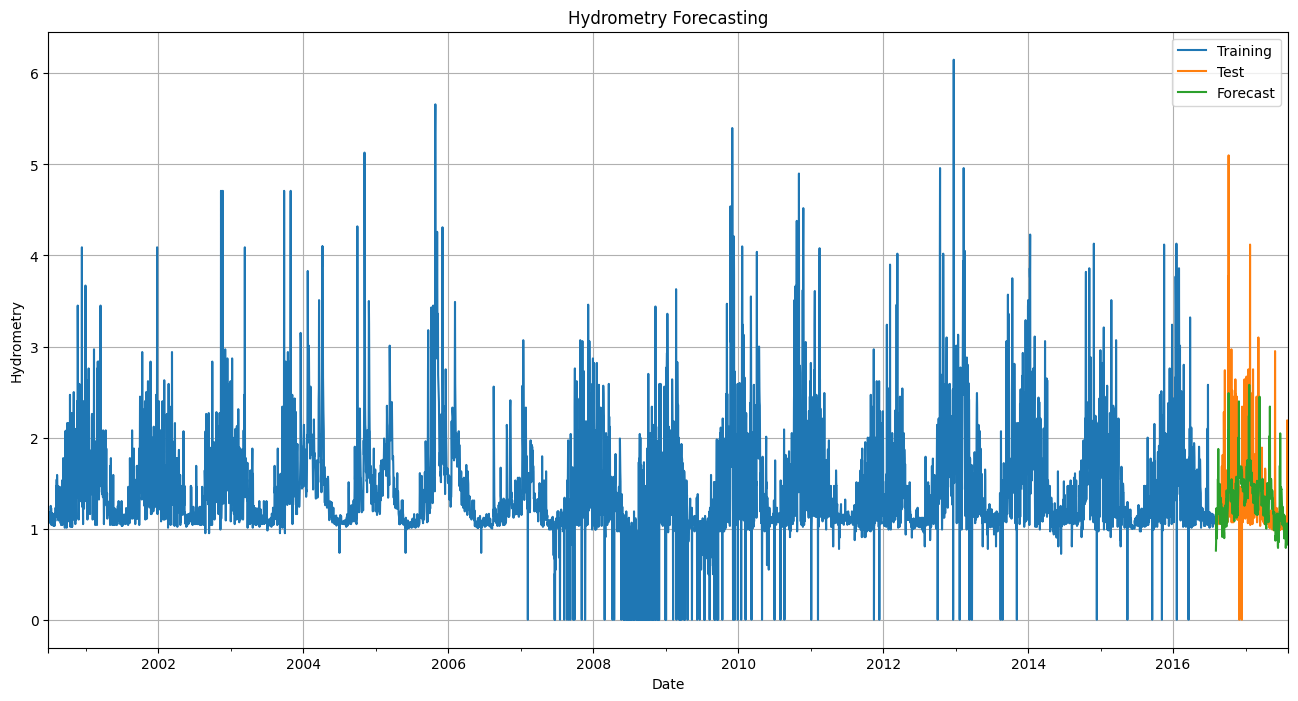

In [16]:
# PLOTTING RESULTS

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
training_y.plot(label='Training', legend=True)
test_y.plot(label='Test', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.title("Hydrometry Forecasting")
plt.xlabel("Date")
plt.ylabel("Hydrometry")
plt.grid()
plt.show()

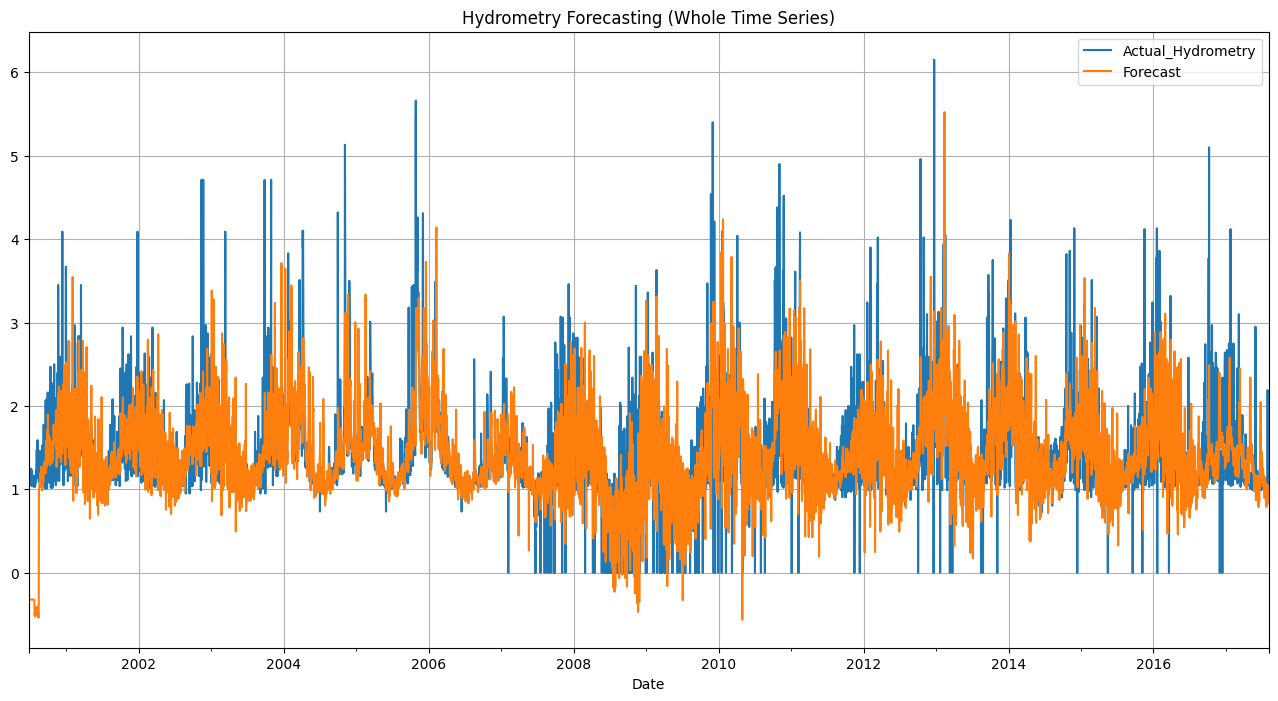

In [18]:
# PLOTTING WHOLE TIME SERIES FORECAST AND ORIGINAL DATA

in_sample_fitted_values = results.fittedvalues
full_predicted = pd.concat([in_sample_fitted_values, forecast])

df["Forecast"] = full_predicted

df[["Actual_Hydrometry", "Forecast"]].plot(figsize=(16,8))
plt.title("Hydrometry Forecasting (Whole Time Series)")
plt.grid()
plt.show()

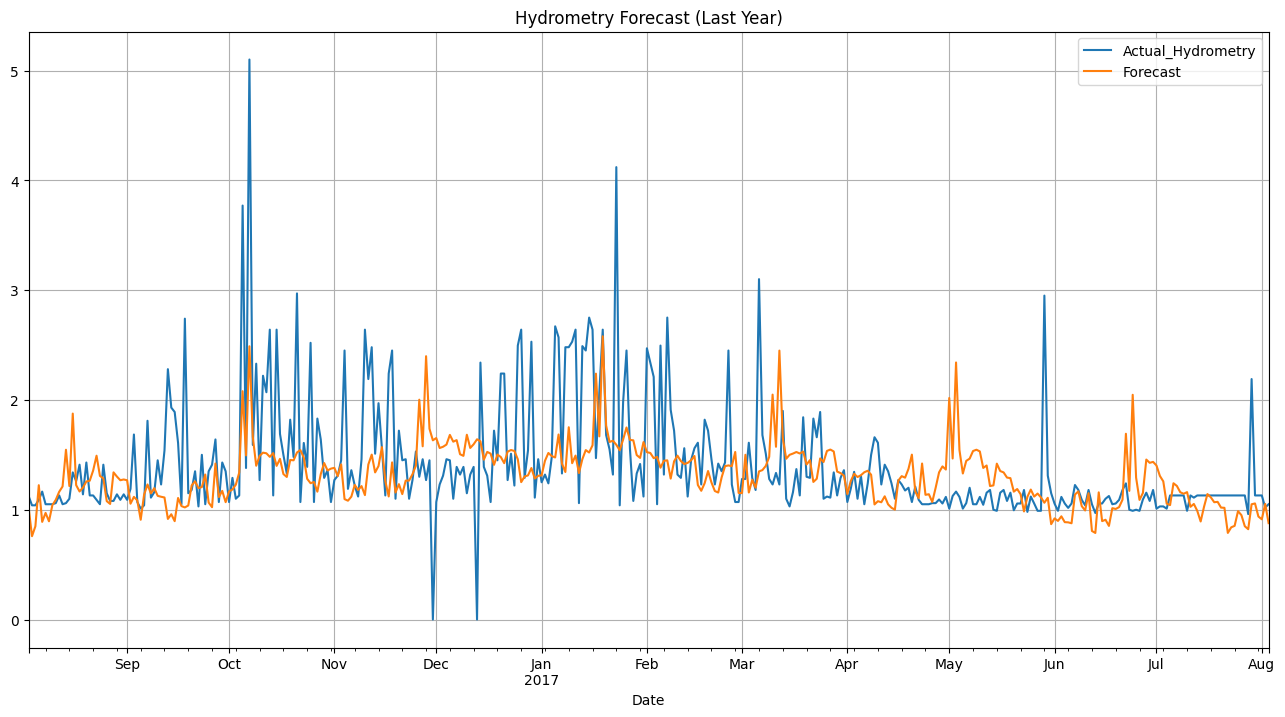

In [19]:
# PLOTTING LAST YEAR FORECAST

last_year = df.loc[df.index >= df.index[-1] - pd.DateOffset(years=1)]

# PLOT LAST YEAR FORECAST

last_year[["Actual_Hydrometry", "Forecast"]].plot(figsize=(16, 8))
plt.title("Hydrometry Forecast (Last Year)")
plt.grid()
plt.show()

In [ ]:
# NEXT:

# IMPLEMENTING A NEW MODEL: LSTM
# IMPLEMENTING A NEW MODEL: XGBOOST
# IMPLEMENTING SOME METRICS TO EVALUATE THE MODELS